# Levy Quantum Path

----------------------

* Continuous Random Walk

In [8]:
%matplotlib inline

In [1]:
import math, random

beta = 4.0
N = 8
sigma = math.sqrt(beta / N)
x = [0.0]
for k in range(N - 1):
    x.append(random.gauss(x[-1], sigma))
print x


[0.0, 1.01509231498381, 0.8954574749069657, 0.4475173962954569, -0.6617069586993383, -0.38473534012694194, -0.6521628289908354, -1.550921896951777]


* Trivial Free Path

In [2]:
import math, random

beta = 1.0
N = 8
sigma = math.sqrt(beta / N)
xend = 1.0
Upsilon = [0.0]
for k in range(N):
    Upsilon.append(random.gauss(Upsilon[-1], sigma))
x = [0.0] + [Upsilon[k] + (xend - Upsilon[-1]) * \
             k / float(N) for k in range(1, N + 1)]
print x


[0.0, 0.16650886545595994, 0.6100876683233167, 1.2878936165304946, 1.522730604023694, 1.8655448259378942, 1.8779816089586798, 1.4174193447820458, 1.0]


* Levy Free Path

In [3]:
import math, random

beta = 1.0
N = 4
dtau = beta / N
nsteps = 10                      # number of paths to be generated
xstart, xend = 0.0, 1.0          # initial and final points
for step in range(nsteps):
    x = [xstart]
    for k in range(1, N):        # loop over internal slices
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    x.append(xend)
    print x

[0.0, 0.5707795321525617, 0.5866019527578654, 0.8089609595648815, 1.0]
[0.0, -0.3396754967087857, 0.7235057663520837, 1.1315669585984993, 1.0]
[0.0, 0.018063918143963353, 0.16434572728171748, 0.592993315765318, 1.0]
[0.0, 0.2246140968885552, 0.966182738296046, 0.746201579459617, 1.0]
[0.0, -0.23985854999079953, -0.23870459469931876, 0.14380281472001558, 1.0]
[0.0, 0.15962908547527493, 1.137840942610433, 1.3625924641454001, 1.0]
[0.0, -1.1579809269318322, -1.0786715345985927, 0.4854709061903433, 1.0]
[0.0, 0.1404369341832184, 0.4541880825433704, 0.8673479702904441, 1.0]
[0.0, 0.7425438080805121, 0.8693731794283786, 1.3336622912118516, 1.0]
[0.0, 0.12440416711297678, 0.2510353241093216, 1.1245847853705508, 1.0]


* Naive Harmonic Path 

In [4]:
import math, random

def rho_free(x, y, beta):    # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

beta = 4.0
N = 8                        # number of slices
dtau = beta / N
delta = 1.0                  # maximum displacement of one bead
n_steps = 20                 # number of Monte Carlo steps
x = [0.0] * N                # initial path
for step in xrange(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight = (rho_free(x[knext], x[k], dtau) *
                  rho_free(x[k], x[kprev], dtau) *
                  math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight = (rho_free(x[knext], x_new, dtau) *
                  rho_free(x_new, x[kprev], dtau) *
                  math.exp(-0.5 * dtau * x_new ** 2))
    if random.random() < new_weight / old_weight:
        x[k] = x_new
    print x


[0.0, 0.28998171631723735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.28998171631723735, -0.4471023666935825, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.28998171631723735, -0.4471023666935825, 0.0, -0.6140259897130926, 0.0, 0.0, 0.0]
[0.0, 0.28998171631723735, -0.4471023666935825, 0.0, -0.6140259897130926, 0.186270538173831, 0.0, 0.0]
[0.0, 0.28998171631723735, -0.6819150385978625, 0.0, -0.6140259897130926, 0.186270538173831, 0.0, 0.0]
[0.0, 0.28998171631723735, -0.6819150385978625, 0.0, -0.6140259897130926, 0.186270538173831, 0.0, 0.0]
[0.0, 0.28998171631723735, -0.6819150385978625, 0.0, -0.6140259897130926, 0.186270538173831, 0.0, -0.016680482140545738]
[0.0, 0.28998171631723735, -0.6819150385978625, 0.0, -0.6140259897130926, -0.5351955742208034, 0.0, -0.016680482140545738]
[0.0, 0.28998171631723735, -0.6819150385978625, 0.0, -0.6140259897130926, -0.5351955742208034, 0.0, -0.016680482140545738]
[0.0, 0.28998171631723735, -0.6819150385978625, 0.0, -0.5748380328995746, -0.5351955742208034, 0.0, -0.01

* Naive Path Slice

In [6]:
import math, random

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

dtau_prime  = 0.1
dtau_dprime = 0.2
x_prime  = 0.0
x_dprime = 1.0
delta = 1.0
n_steps = 10
xk = 0.0
for step in xrange(n_steps):
    xk_new = xk + random.uniform(-delta, delta)
    old_weight  = (rho_free(x_dprime, xk, dtau_dprime) *
                   rho_free(xk, x_prime, dtau_prime))
    new_weight  = (rho_free(x_dprime, xk_new, dtau_dprime) * 
                   rho_free(xk_new, x_prime, dtau_prime))
    if random.random() < new_weight / old_weight:
        xk = xk_new
    print xk


0.095401252446
0.095401252446
0.512795106019
0.512795106019
0.512795106019
0.512795106019
0.512795106019
0.512795106019
0.901968228505
0.901968228505


* Naive Path Slice Movie

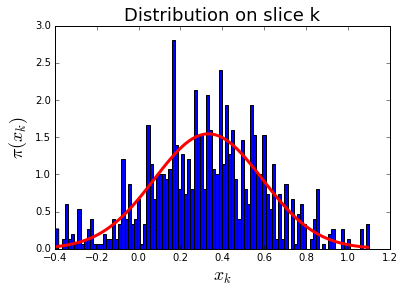

In [9]:
import math, random, pylab

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

dtau_prime  = 0.1
dtau_dprime = 0.2
x_prime  = 0.0
x_dprime = 1.0
delta = 1.0                 # maximum displacement of xk
n_steps = 1000           # number of Monte Carlo steps
data_hist = []
xk = 0.0                    # initial value of xk
for step in xrange(n_steps):
    xk_new = xk + random.uniform(-delta, delta)
    old_weight  = (rho_free(x_dprime, xk, dtau_dprime) *
                   rho_free(xk, x_prime, dtau_prime))
    new_weight  = (rho_free(x_dprime, xk_new, dtau_dprime) * 
                   rho_free(xk_new, x_prime, dtau_prime))
    if random.random() < new_weight / old_weight:
        xk = xk_new
    data_hist.append(xk)

def pi_analytic(xk, x_prime, x_dprime, dtau_prime, dtau_dprime):
    mean = (dtau_dprime * x_prime + dtau_prime * x_dprime) / (dtau_prime + dtau_dprime)
    sigma = 1.0 / math.sqrt(1.0 / dtau_prime + 1.0 / dtau_dprime)
    return math.exp(-(xk - mean) ** 2 / (2.0 * sigma ** 2)) / math.sqrt(2.0 * math.pi) / sigma

pylab.title('Distribution on slice k', fontsize=18)
histo, bin_edges, dummy = pylab.hist(data_hist, bins=100, normed=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
pylab.plot(bin_centers, [pi_analytic(x, x_prime, x_dprime, dtau_prime, dtau_dprime) for x in bin_centers], 'r-', lw=3)
pylab.xlabel('$x_k$', fontsize=18)
pylab.ylabel('$\pi(x_k)$', fontsize=18)
#pylab.savefig('plot-path_slice.png')
pylab.show()

* Levy Harmonic Path

In [10]:
import math, random

beta = 1.0
N = 4
dtau = beta / N
xstart, xend = 0.0, 1.0
x = [xstart]
for k in range(1, N):
    dtau_prime = (N - k) * dtau
    Ups1 = 1.0 / math.tanh(dtau) + \
           1.0 / math.tanh(dtau_prime)
    Ups2 = x[k - 1] / math.sinh(dtau) + \
           xend / math.sinh(dtau_prime)
    x.append(random.gauss(Ups2 / Ups1, \
             1.0 / math.sqrt(Ups1)))
x.append(xend)
print x

[0.0, -0.3585400331470993, -0.46657041443239394, 0.01352956236855482, 1.0]


* Levy Harmonic Path 3D

In [11]:
import math, random

def levy_harmonic_1d(start, end, dtau):
    x = [start]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               end / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
                 1.0 / math.sqrt(Ups1)))
    x.append(end)
    return x

beta = 1.0
N = 20
dtau = beta / float(N)
[xstart, ystart, zstart] = [1.0, -2.0, 1.5]
[xend, yend, zend] = [-2.5, 0.0, -0.5]
x = levy_harmonic_1d(xstart, xend, dtau)
y = levy_harmonic_1d(ystart, yend, dtau)
z = levy_harmonic_1d(zstart, zend, dtau)
for i in range(N + 1):
    print 'slice %2i:  ' % i, x[i], y[i], z[i]


slice  0:   1.0 -2.0 1.5
slice  1:   0.777748893943 -2.10539607648 1.73826482099
slice  2:   0.763931019379 -2.14387236587 1.54684977036
slice  3:   0.500747263585 -2.08049210773 1.58757506994
slice  4:   0.429361380948 -1.98193292492 1.51647256244
slice  5:   0.156144949185 -2.08472795151 1.24115678993
slice  6:   -0.301482536938 -2.31425875183 1.2116215967
slice  7:   -0.114110853331 -2.01170186332 1.31953455601
slice  8:   -0.495169243534 -1.78954410128 1.26715746611
slice  9:   -1.07124864136 -1.84323749154 1.22618560998
slice 10:   -1.02146009154 -1.4469573166 1.12287349028
slice 11:   -1.2202731479 -1.25130592701 1.17356480665
slice 12:   -1.44734039796 -0.769759958407 0.871271945556
slice 13:   -1.59945389072 -0.917060277419 0.950203408728
slice 14:   -1.59348122639 -0.750802821523 0.624546501494
slice 15:   -1.79081758311 -0.666414256381 0.444743391328
slice 16:   -1.99247299059 -0.44958639971 0.362047069815
slice 17:   -1.75822763813 -0.389265378081 0.0467617492471
slice 18:  

* Levy Harmonic Path Movie

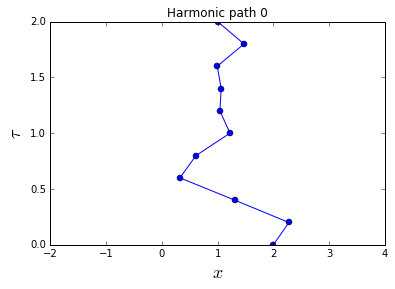

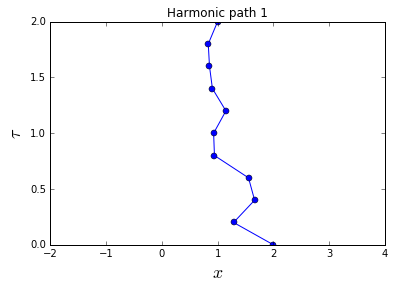

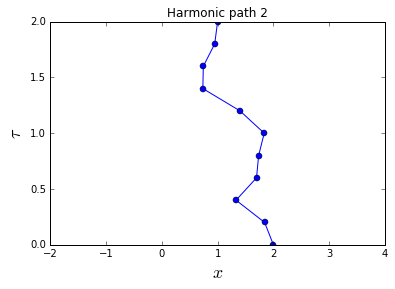

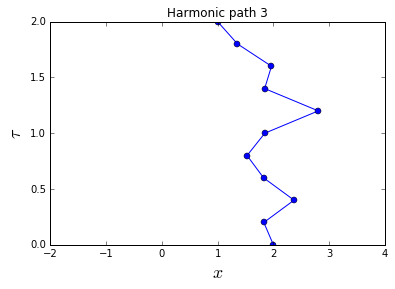

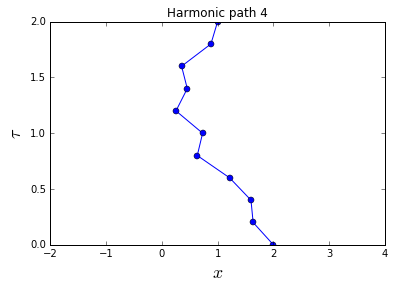

In [12]:
import math, random, pylab

beta = 2.0
N = 10
dtau = beta / N
nsteps = 5
xstart, xend = 2.0, 1.0
for step in range(nsteps):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
                 1.0 / math.sqrt(Ups1)))
    x.append(xend)
    # graphics
    pylab.plot(x, [j * dtau for j in range(N + 1)], 'bo-')
    pylab.xlabel('$x$', fontsize=18)
    pylab.ylabel('$\\tau$', fontsize=18)
    pylab.title('Harmonic path %i' % step)
    pylab.xlim(-2.0, 4.0)
    pylab.show()
    #pylab.close()

# TUTORIAL

--------------------

* Naive Single Particle

In [13]:
Emax = 5
States = []
for E_x in range(Emax):
    for E_y in range(Emax):
        for E_z in range(Emax):
            States.append(((E_x + E_y + E_z), (E_x, E_y, E_z)))
States.sort()
for k in range(5):
    print '%3d' % k, States[k][0], States[k][1]


  0 0 (0, 0, 0)
  1 1 (0, 0, 1)
  2 1 (0, 1, 0)
  3 1 (1, 0, 0)
  4 2 (0, 0, 2)


* Naive Boson Trap

In [14]:
import math

Energy = [0.0] + [1.0] * 3 + [2.0] * 6 + [3.0] * 10 + [4.0] * 15
beta = 1.0
n_states = 0
Z = 0.0
N0_mean = 0.0
E_mean = 0.0
for s_0 in range(35):
    for s_1 in range(s_0, 35):
        for s_2 in range(s_1, 35):
            for s_3 in range(s_2, 35):
                for s_4 in range(s_3, 35):
                    n_states += 1
                    state = [s_0, s_1, s_2, s_3, s_4]
                    E = sum(Energy[s] for s in state)
                    Z += math.exp(-beta * E)
                    E_mean += E * math.exp(-beta * E)
                    N0_mean += state.count(0) *\
                               math.exp(-beta * E)
print n_states, Z, E_mean / Z / 5.0, N0_mean / Z / 5.0


575757 17.3732972183 1.03133265311 0.446969501933
